In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [12]:
#parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

alpha = 1e-4

#discretize domain
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

#initial conditions
# T is a 2d array with (y, x)
#begin with all at 20C except the x = 0 and y = 0 is 100C
T0 = 20.0 * numpy.ones((ny, nx))
T0[0,:] = 100.0
T0[:,0] = 100.0
#print(T0)

In [27]:
def ftcs (T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    #calculate center indices
    I = int(nx / 2)
    J = int(ny / 2)
    for n in range(nt):
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                T[j, i] = (T[j, i] + 
                           sigma_x * (T[j, i-1] - 2*T[j,i] + T[j, i+1]) +
                           sigma_y * (T[j-1, i] - 2*T[j,i] + T[j+1, i]))
        T[0,:] = 100.0    #bottom B.C.
        T[:,0] = 100.0    # left  B.C.
        T[-1,:] = T[-2,:] # top   B.C.
        T[:,-1] = T[:,-2] # right B.C.
        if T[J, I] >= 70.0:
            break
    print('Time step {}; Temperature at center is {} C'.format(n, T[J,I]))
    return T

In [28]:
sigma = 0.5
dt = sigma / (alpha * (1 / dx**2 + 1 / dy**2)) 
nt = 500

In [29]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

Time step 127; Temperature at center is 70.12723235676388 C


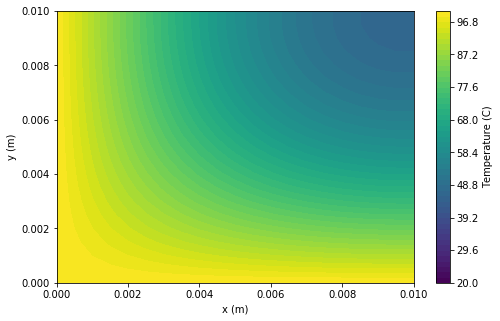

In [30]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x (m)')
pyplot.ylabel('y (m)')
contf = pyplot.contourf(x, y, T,
                        levels=numpy.linspace(20.0, 100.0, num = 51))
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature (C)')